In [2]:
import re
import nltk
# downloading the stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import confusion_matrix

import bz2
import textblob as tb

import numpy as np 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train = pd.read_csv('train_small.csv')
test  = pd.read_csv('test_small.csv')

In [4]:
test.head()

,Unnamed: 0,Sentence,Labels
0,0,great cd: my lovely pat has one of the great v...,1
1,1,one of the best game music soundtracks - for a...,1
2,2,batteries died within a year ...: i bought thi...,0
3,3,"works fine, but maha energy is better: check o...",1
4,4,great for the non-audiophile: reviewed quite a...,1


In [ ]:
test_line = ["This product is ok to use. Neither great nor bad. easy to use . simple design . elegant work."]

In [5]:
test.loc[len(test.index)] = [1000,'This product is ok to use. Neither great nor bad. easy to use . simple design . elegant work.',1]

In [6]:
test

,Unnamed: 0,Sentence,Labels
0,0,great cd: my lovely pat has one of the great v...,1
1,1,one of the best game music soundtracks - for a...,1
2,2,batteries died within a year ...: i bought thi...,0
3,3,"works fine, but maha energy is better: check o...",1
4,4,great for the non-audiophile: reviewed quite a...,1
...,...,...,...
996,996,best film of the year: one of the best films e...,1
997,997,see this movie just for ian mckellen's perform...,1
998,998,best screenplays have more stability: one of t...,1
999,999,tree arrived bent and poorly packed: the manuf...,0


In [7]:
sents=[]
alll=[]
stopwords_set=set(stopwords.words('english'))

def word_clean(train):
    for _,row in train.iterrows():
        words_filtered=[e.lower() for e in row.Sentence.split() if len(e)>=3]
        words_filtered=[word for word in words_filtered if 'http' not in word
                       and not word.startswith('@')
                       and not word.startswith('#')
                       and word !='RT']
        words_filtered=[word for word in words_filtered if not word in stopwords_set]
        sents.append((words_filtered, row.Labels))
        alll.extend(words_filtered)
cleaned_train=word_clean(train)

In [8]:
def get_word_features(wordlist):
    wordlists=nltk.FreqDist(wordlist)
    features=list(wordlists.keys())
    return features

w_features=get_word_features(alll)
w_features[:5]

['stuning', 'even', 'non-gamer:', 'sound', 'track']

In [9]:
def extract_features(doc):
    doc_u=set(doc)
    features={}
    for word in w_features:
        features['contains(%s)' %word]=(word in doc_u)
    return features

In [10]:
training_set=nltk.classify.apply_features(extract_features, sents)

In [11]:
contractions= {'you’ve': 'you have', 'you’re': 'you are', 'you’ll’ve': 'you shall have', 'you’ll': 'you will', 'you’d’ve': 'you would have', 'you’d': 'you would', 'y’all’ve': 'you all have', 'y’all’re': 'you all are', 'y’all’d’ve': 'you all would have', 'y’all’d': 'you all would', 'y’all': 'you all', 'wouldn’t’ve': 'would not have', 'wouldn’t': 'would not', 'would’ve': 'would have', 'won’t’ve': 'will not have', 'won’t': 'will not', 'will’ve': 'will have', 'why’ve': 'why have', 'why’s': 'why is', 'who’ve': 'who have', 'who’s': 'who is', 'who’ll’ve': 'who will have', 'who’ll': 'who will', 'where’ve': 'where have', 'where’s': 'where is', 'where’d': 'where did', 'when’ve': 'when have', 'when’s': 'when is', 'what’ve': 'what have', 'what’s': 'what is', 'what’re': 'what are', 'what’ll’ve': 'what will have', 'what’ll': 'what will', 'weren’t': 'were not', 'we’ve': 'we have', 'we’re': 'we are', 'we’ll’ve': 'we will have', 'we’ll': 'we will', 'we’d’ve': 'we would have', 'we’d': 'we would', 'wasn’t': 'was not', 'to’ve': 'to have', 'they’ve': 'they have', 'they’re': 'they are', 'they’ll’ve': 'they will have', 'they’ll': 'they will', 'they’d’ve': 'they would have', 'they’d': 'they would', 'there’s': 'there is', 'there’d’ve': 'there would have', 'there’d': 'there would', 'that’s': 'that is', 'that’d’ve': 'that would have', 'that’d': 'that would', 'so’s': 'so is', 'so’ve': 'so have', 'shouldn’t’ve': 'should not have', 'shouldn’t': 'should not', 'should’ve': 'should have', 'she’s': 'she is', 'she’ll’ve': 'she will have', 'she’ll': 'she will', 'she’d’ve': 'she would have', 'she’d': 'she would', 'shan’t’ve': 'shall not have', 'sha’n’t': 'shall not', 'shan’t': 'shall not', 'oughtn’t’ve': 'ought not have', 'oughtn’t': 'ought not', 'o’clock': 'of the clock', 'needn’t’ve': 'need not have', 'needn’t': 'need not', 'mustn’t’ve': 'must not have', 'mustn’t': 'must not', 'must’ve': 'must have', 'mightn’t’ve': 'might not have', 'mightn’t': 'might not', 'might’ve': 'might have', 'mayn’t': 'may not', 'ma’am': 'madam', 'let’s': 'let us', 'it’s': 'it is', 'it’ll’ve': 'it will have', 'it’ll': 'it will', 'it’d’ve': 'it would have', 'it’d': 'it would', 'isn’t': 'is not', 'I’ve': 'I have', 'I’m': 'I am', 'I’ll’ve': 'I will have', 'I’ll': 'I will', 'I’d’ve': 'I would have', 'I’d': 'I would', 'how’s': 'how is', 'how’ll': 'how will', 'how’d’y': 'how do you', 'how’re': 'how are', 'how’d': 'how did', 'he’s': 'he is', 'he’ll’ve': 'he will have', 'he’ll': 'he will', 'he’d’ve': 'he would have', 'he’d': 'he would', 'haven’t': 'have not', 'hasn’t': 'has not', 'hadn’t’ve': 'had not have', 'hadn’t': 'had not', 'don’t': 'do not', 'doesn’t': 'does not', 'didn’t': 'did not', 'couldn’t’ve': 'could not have', 'couldn’t': 'could not', 'could’ve': 'could have', '’cause': 'because', 'can’t’ve': 'can not have', 'can’t': 'can not', 'aren’t': 'are not', 'ain’t': 'are not', 'dec.': 'december', 'nov.': 'november', 'oct.': 'october', 'sep.': 'september', 'aug.': 'august', 'jul.': 'july', 'jun.': 'june', 'apr.': 'april', 'mar.': 'march', 'feb.': 'february', 'jan.': 'january', "you've": 'you have', "you're": 'you are', "you'll've": 'you shall have', "you'll": 'you will', "you'd've": 'you would have', "you'd": 'you would', "y'all've": 'you all have', "y'all're": 'you all are', "y'all'd've": 'you all would have', "y'all'd": 'you all would', "y'all": 'you all', "wouldn't've": 'would not have', "wouldn't": 'would not', "would've": 'would have', "won't've": 'will not have', "won't": 'will not', "will've": 'will have', "why've": 'why have', "why's": 'why is', "who've": 'who have', "who's": 'who is', "who'll've": 'who will have', "who'll": 'who will', "where've": 'where have', "where's": 'where is', "where'd": 'where did', "when've": 'when have', "when's": 'when is', "what've": 'what have', "what's": 'what is', "what're": 'what are', "what'll've": 'what will have', "what'll": 'what will', "weren't": 'were not', "we've": 'we have', "we're": 'we are', "we'll've": 'we will have', "we'll": 'we will', "we'd've": 'we would have', "we'd": 'we would', "wasn't": 'was not', "to've": 'to have', "they've": 'they have', "they're": 'they are', "they'll've": 'they will have', "they'll": 'they will', "they'd've": 'they would have', "they'd": 'they would', "there's": 'there is', "there'd've": 'there would have', "there'd": 'there would', "that's": 'that is', "that'd've": 'that would have', "that'd": 'that would', "so's": 'so is', "so've": 'so have', "shouldn't've": 'should not have', "shouldn't": 'should not', "should've": 'should have', "she's": 'she is', "she'll've": 'she will have', "she'll": 'she will', "she'd've": 'she would have', "she'd": 'she would', "shan't've": 'shall not have', "sha'n't": 'shall not', "shan't": 'shall not', "oughtn't've": 'ought not have', "oughtn't": 'ought not', "o'clock": 'of the clock', "needn't've": 'need not have', "needn't": 'need not', "mustn't've": 'must not have', "mustn't": 'must not', "must've": 'must have', "mightn't've": 'might not have', "mightn't": 'might not', "might've": 'might have', "mayn't": 'may not', "ma'am": 'madam', "let's": 'let us', "it's": 'it is', "it'll've": 'it will have', "it'll": 'it will', "it'd've": 'it would have', "it'd": 'it would', "isn't": 'is not', "I've": 'I have', "I'm": 'I am', "I'll've": 'I will have', "I'll": 'I will', "I'd've": 'I would have', "I'd": 'I would', "how's": 'how is', "how'll": 'how will', "how'd'y": 'how do you', "how're": 'how are', "how'd": 'how did', "he's": 'he is', "he'll've": 'he will have', "he'll": 'he will', "he'd've": 'he would have', "he'd": 'he would', "hasn't": 'has not',"haven't": 'have not', "hadn't've": 'had not have', "hadn't": 'had not', "don't": 'do not', "doesn't": 'does not', "didn't": 'did not', "couldn't've": 'could not have', "couldn't": 'could not', "could've": 'could have', "'cause": 'because', "can't've": 'can not have', "can't": 'can not', "aren't": 'are not',"ain't": 'are not', "aren't": 'are not'}


In [12]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
import nltk
nltk.download('wordnet')

# from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from nltk.stem import 	WordNetLemmatizer
lemm = WordNetLemmatizer()
ps = PorterStemmer()

In [15]:

stopwords=nltk.corpus.stopwords.words('english')
stopwords.remove('no')
stopwords.remove('not')
stopwords.remove('but')

def clean_data(text):
    text1=text.split()
    
    for i, j in enumerate(text1):
        if j in contractions.keys():
            text1[i]=contractions[j]
        else:
            text1[i]
    text=" ".join(text1)
    text=str(text).lower()
    text=text.strip()
    text=re.sub(r'[^a-z\s]','',text,re.I|re.A)
    token=nltk.word_tokenize(text)
    tokens=[ps.stem(word) for word in token if word not in stopwords]
    
    text=' '.join(tokens)
    
    
    return text

In [16]:
train.Sentence[24]

'i liked this album more then i thought i would: i heard a song or two and thought same o same o,but when i listened to songs like "blue angel","lanna" and \'mama" the hair just rose off my neck.roy is trully an amazing singer with a talent you don\'t find much now days.'

In [19]:
train_dt=pd.DataFrame()
train_dt['Sentence']=train['Sentence'].apply(lambda x:clean_data(x))
train_dt['Labels']=train['Labels']
train_dt.head(10)

test_dt=pd.DataFrame()
test_dt['Sentence']=test['Sentence'].apply(lambda x:clean_data(x))
test_dt['Labels']=test['Labels']
test_dt.head(10)

,Sentence,Labels
0,great cd love pat one great voic gener listen ...,1
1,one best game music soundtrack game not realli...,1
2,batteri die within year bought charger jul wor...,0
3,work fine but maha energi better check maha en...,1
4,great nonaudiophil review quit bit combo playe...,1
5,dvd player crap one year also began incorrect ...,0
6,incorrect disc love style but coupl year dvd g...,0
7,dvd menu select problem not scroll dvd menu se...,0
8,uniqu weird orientalia exot tale orient dr she...,1
9,not ultim guid firstlyi enjoy format tone book...,0


In [21]:
train_dt.Sentence[24]

'like album thought would heard song two thought obut listen song like blue angellanna mama hair rose neckroy trulli amaz singer talent not find much day'

In [22]:
test

,Unnamed: 0,Sentence,Labels
0,0,great cd: my lovely pat has one of the great v...,1
1,1,one of the best game music soundtracks - for a...,1
2,2,batteries died within a year ...: i bought thi...,0
3,3,"works fine, but maha energy is better: check o...",1
4,4,great for the non-audiophile: reviewed quite a...,1
...,...,...,...
996,996,best film of the year: one of the best films e...,1
997,997,see this movie just for ian mckellen's perform...,1
998,998,best screenplays have more stability: one of t...,1
999,999,tree arrived bent and poorly packed: the manuf...,0


In [23]:
train_sentiment_obj=train_dt['Sentence'].apply(lambda x:tb.TextBlob(x).sentiment)
train_sentiment=pd.DataFrame()
train_sentiment['Subjectivity']=[word[0] for word in train_sentiment_obj]
train_sentiment['Polarity'] =[word[1] for word in train_sentiment_obj]

test_sentiment=pd.DataFrame()
test_sentiment_obj=test_dt['Sentence'].apply(lambda x:tb.TextBlob(x).sentiment)
test_sentiment['Subjectivity']=[word[0] for word in test_sentiment_obj]
test_sentiment['Polarity'] =[word[1] for word in test_sentiment_obj]
test_sentiment.head(2)

,Subjectivity,Polarity
0,0.214444,0.445556
1,0.025000,0.442857


In [24]:
test_sentiment

,Subjectivity,Polarity
0,0.214444,0.445556
1,0.025000,0.442857
2,0.533333,0.666667
3,0.472222,0.500000
4,0.344048,0.565476
...,...,...
996,0.666667,0.200000
997,0.427083,0.533854
998,0.440476,0.390476
999,0.025000,0.100000


In [44]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',max_features = 7000)
tfidf_wm = tfidfvectorizer.fit_transform(train_dt['Sentence'])
train_tf=pd.DataFrame(tfidf_wm.toarray(), columns=tfidfvectorizer.get_feature_names())
train_tf.index=train_dt.index
train_tf[:2]


,00,aa,ab,abandon,abba,abc,abil,abl,abomin,abound,...,ziggi,zipper,zodiac,zoe,zombi,zone,zoom,zoot,zr,zrmc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',max_features = 7000)
tfidf_wm_test = tfidfvectorizer.fit_transform(test_dt['Sentence'])
test_tf=pd.DataFrame(tfidf_wm_test.toarray(), columns=tfidfvectorizer.get_feature_names())
test_tf.index=test_dt.index
test_tf[:2]


,aa,aaarrrggghhh,abandon,abarca,abbrevi,abduct,abil,abit,abl,aboard,...,zero,zeta,zetahipboot,zetajo,zetajon,zhivago,ziggi,zillion,zr,zydeco
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
train_combined_tf=pd.concat([train_tf,train_sentiment], axis=1, )
test_combined_tf=pd.concat([test_tf, test_sentiment], axis=1)
train_combined_tf.head()

,00,aa,ab,abandon,abba,abc,abil,abl,abomin,abound,...,zodiac,zoe,zombi,zone,zoom,zoot,zr,zrmc,Subjectivity,Polarity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.144444,0.422222
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420000,0.260000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111458,0.468866
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085714,0.357143
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.425000,0.587500


In [29]:
cv=CountVectorizer(stop_words='english')
train_cv=cv.fit_transform(train_dt.Sentence)
train_cv=pd.DataFrame(train_cv.toarray(), columns=cv.get_feature_names())
train_cv.index=train_dt.index
train_cv[:2]

,00,000,0000kbp,aa,aaa,aaaarrrggggghhhhhh,aaargh,aabril,aaf,aand,...,zzzz,zzzzz,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzsnoozefest,zzzzzzzzzzzz,zzzzzzzzzzzzzi,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
test_cv=cv.transform(test_dt.Sentence)
test_cv=pd.DataFrame(test_cv.toarray(), columns=cv.get_feature_names())
test_cv.index=test_dt.index
test_cv.head(2)

,00,000,0000kbp,aa,aaa,aaaarrrggggghhhhhh,aaargh,aabril,aaf,aand,...,zzzz,zzzzz,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzsnoozefest,zzzzzzzzzzzz,zzzzzzzzzzzzzi,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
test_c

,00,000,0000kbp,aa,aaa,aaaarrrggggghhhhhh,aaargh,aabril,aaf,aand,...,zzzz,zzzzz,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzsnoozefest,zzzzzzzzzzzz,zzzzzzzzzzzzzi,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
(train_cv.values.max())

00                       4
000                      2
0000kbp                  1
aa                       2
aaa                      3
                        ..
zzzzzzzzzzsnoozefest     1
zzzzzzzzzzzz             1
zzzzzzzzzzzzzi           1
zzzzzzzzzzzzzzzzzz       1
zzzzzzzzzzzzzzzzzzzzz    1
Length: 28537, dtype: int64

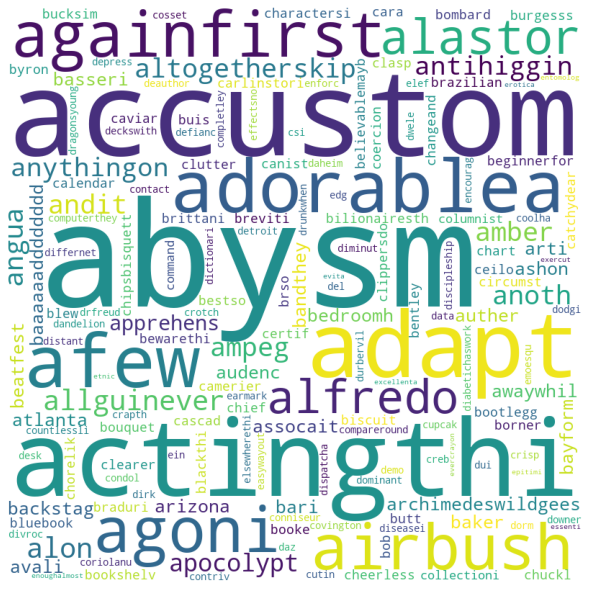

In [31]:
comment_words = ''
lst = []
for col in train_cv.columns[100:10000:50]:
    col = str(col)
    #print(col)
    comment_words += col + " "
#    print(comment_words)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
train_combined=pd.concat([train_cv,train_sentiment], axis=1)
test_combined=pd.concat([test_cv, test_sentiment], axis=1)
train_combined.head()

,00,000,0000kbp,aa,aaa,aaaarrrggggghhhhhh,aaargh,aabril,aaf,aand,...,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzsnoozefest,zzzzzzzzzzzz,zzzzzzzzzzzzzi,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,Subjectivity,Polarity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.144444,0.422222
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.420000,0.260000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.111458,0.468866
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.085714,0.357143
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.425000,0.587500


In [33]:
train_combined.head()

,00,000,0000kbp,aa,aaa,aaaarrrggggghhhhhh,aaargh,aabril,aaf,aand,...,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzsnoozefest,zzzzzzzzzzzz,zzzzzzzzzzzzzi,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,Subjectivity,Polarity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.144444,0.422222
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.420000,0.260000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.111458,0.468866
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.085714,0.357143
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.425000,0.587500


In [34]:
test_combined.head()

,00,000,0000kbp,aa,aaa,aaaarrrggggghhhhhh,aaargh,aabril,aaf,aand,...,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzsnoozefest,zzzzzzzzzzzz,zzzzzzzzzzzzzi,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,Subjectivity,Polarity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.214444,0.445556
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.025000,0.442857
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.533333,0.666667
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.472222,0.500000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.344048,0.565476


In [35]:
LR=LogisticRegression()
LR.fit(train_combined,train['Labels'])
predict=LR.predict(test_combined)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
predict

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
print('Confusion Matrix:\n',confusion_matrix(test['Labels'],predict))
print('\n')
print('Accuracy Score:\n',accuracy_score(test['Labels'], predict))
print('\nClassification Score: \n', classification_report(test['Labels'], predict))

Confusion Matrix:
 [[427  71]
 [ 67 436]]


Accuracy Score:
 0.8621378621378621

Classification Score: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       498
           1       0.86      0.87      0.86       503

    accuracy                           0.86      1001
   macro avg       0.86      0.86      0.86      1001
weighted avg       0.86      0.86      0.86      1001



In [38]:
from sklearn.naive_bayes import BernoulliNB
RF=BernoulliNB()
RF.fit(train_combined, train['Labels'])
predict_rf_1= RF.predict(test_combined)

print('Confusion Matrix: \n', confusion_matrix(test['Labels'], predict_rf_1))
print('\nAccuracy Score: ', accuracy_score(test['Labels'], predict_rf_1))
print('\nClassification Score: \n', classification_report(test['Labels'], predict_rf_1))

Confusion Matrix: 
 [[430  68]
 [ 83 420]]

Accuracy Score:  0.8491508491508492

Classification Score: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       498
           1       0.86      0.83      0.85       503

    accuracy                           0.85      1001
   macro avg       0.85      0.85      0.85      1001
weighted avg       0.85      0.85      0.85      1001



In [39]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=10)
RF_clf.fit(train_combined,train['Labels'])
predicted = RF_clf.predict(test_combined)

In [40]:
print('Confusion Matrix: \n', confusion_matrix(test['Labels'], predicted))
print('\nAccuracy Score: ', accuracy_score(test['Labels'], predicted))
print('\nClassification Score: \n', classification_report(test['Labels'], predicted))

Confusion Matrix: 
 [[420  78]
 [142 361]]

Accuracy Score:  0.7802197802197802

Classification Score: 
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       498
           1       0.82      0.72      0.77       503

    accuracy                           0.78      1001
   macro avg       0.78      0.78      0.78      1001
weighted avg       0.79      0.78      0.78      1001



In [41]:
LR=LogisticRegression()
LR.fit(train_combined_tf,train['Labels'])
predict=LR.predict(test_combined_tf)

In [76]:
print('Confusion Matrix:\n',confusion_matrix(test['Labels'],predict))
print('\n')
print('Accuracy Score:\n',accuracy_score(test['Labels'], predict))
print('\nClassification Score: \n', classification_report(test['Labels'], predict))

Confusion Matrix:
 [[428  70]
 [ 77 425]]


Accuracy Score:
 0.853

Classification Score: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       498
           1       0.86      0.85      0.85       502

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



In [46]:
RF=BernoulliNB()
RF.fit(train_combined_tf, train['Labels'])
predict_rf_1= RF.predict(test_combined_tf)

print('Confusion Matrix: \n', confusion_matrix(test['Labels'], predict_rf_1))
print('\nAccuracy Score: ', accuracy_score(test['Labels'], predict_rf_1))
print('\nClassification Score: \n', classification_report(test['Labels'], predict_rf_1))

Confusion Matrix: 
 [[256 242]
 [214 289]]

Accuracy Score:  0.5444555444555444

Classification Score: 
               precision    recall  f1-score   support

           0       0.54      0.51      0.53       498
           1       0.54      0.57      0.56       503

    accuracy                           0.54      1001
   macro avg       0.54      0.54      0.54      1001
weighted avg       0.54      0.54      0.54      1001



In [47]:
from sklearn.naive_bayes import MultinomialNB
RF=MultinomialNB()
RF.fit(train_cv, train['Labels'])
predict_rf_1= RF.predict(test_cv)

print('Confusion Matrix: \n', confusion_matrix(test['Labels'], predict_rf_1))
print('\nAccuracy Score: ', accuracy_score(test['Labels'], predict_rf_1))
print('\nClassification Score: \n', classification_report(test['Labels'], predict_rf_1))

Confusion Matrix: 
 [[428  70]
 [ 86 417]]

Accuracy Score:  0.8441558441558441

Classification Score: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       498
           1       0.86      0.83      0.84       503

    accuracy                           0.84      1001
   macro avg       0.84      0.84      0.84      1001
weighted avg       0.84      0.84      0.84      1001



In [55]:
cl_t = clean_data(test_line[0])

In [56]:
cl_t

'product ok use neither great bad easi use simpl design eleg work'

In [69]:
tt=pd.DataFrame()
tt['Sentence']=test_line
tt['Sentence'] = tt['Sentence'].apply(lambda x:clean_data(x))
#train_dt['Labels']=train['Labels']

,Sentence
0,product ok use neither great bad easi use simp...


In [72]:
tj=tt['Sentence'].apply(lambda x:tb.TextBlob(x).sentiment)
tr=pd.DataFrame()
tr['Subjectivity']=[word[0] for word in tj]
tr['Polarity'] =[word[1] for word in tj]

In [73]:
tr

# tstl['Subjectivity']=[word[0] for word in tstll]
# tstl['Polarity'] =[word[1] for word in tstll]

,Subjectivity,Polarity
0,0.2,0.638889


In [81]:
td=pd.concat([tt,tr], axis=1)
print(td)

                                            Sentence  Subjectivity  Polarity
0  product ok use neither great bad easi use simp...           0.2  0.638889


In [80]:
cv=CountVectorizer(stop_words='english')
test=cv.fit_transform(tt.Sentence)
test=pd.DataFrame(test.toarray(), columns=cv.get_feature_names())
test.index=test.index
test[:2]

,bad,design,easi,eleg,great,ok,product,simpl,use,work
0,1,1,1,1,1,1,1,1,2,1


In [ ]:
#     # split into tokens by white space
#     tokens = doc.split()
#     # remove punctuation from each token
#     table = str.maketrans('', '', punctuation)
#     tokens = [w.translate(table) for w in tokens]
#     # remove remaining tokens that are not alphabetic
#     tokens = [word for word in tokens if word.isalpha()]
#     # filter out stop words
#     stop_words = set(stopwords.words('english'))
#     tokens = [w for w in tokens if not w in stop_words]
#     # filter out short tokens
#     tokens = [word for word in tokens if len(word) > 1]

In [8]:

from string import punctuation
from os import listdir
from collections import Counter

In [47]:

stopwords=nltk.corpus.stopwords.words('english')
stopwords.remove('no')
stopwords.remove('not')
stopwords.remove('but')

def clean_dat(dat):
    vocab = Counter()
    text1=dat.split()
    
    for i, j in enumerate(text1):
        if j in contractions.keys():
            text1[i]=contractions[j]
        else:
            text1[i]
    text=" ".join(text1)
    text=str(text).lower()
    text=text.strip()
    text=re.sub(r'[^a-z\s]','',text,re.I|re.A)
    token=nltk.word_tokenize(text)
    tokens=[ps.stem(word) for word in token if word not in stopwords]
    vocab.update(tokens)
    #print(vocab)
    #print(vocab.most_common(50))
    return vocab

#def add_doc_to_vocab(tokens, vocab):
    # load doc
    #doc = load_doc(filename)
    # clean doc
#   tokens = clean_dat(doc)
    # update counts
    

In [48]:
vocab = Counter()
#train_dt=pd.DataFrame()
# train_dt['Sentence']=train['Sentence'].apply(lambda x:clean_dat(x))
# train_dt['Labels']=train['Labels']
vocab=train['Sentence'].apply(lambda x:clean_dat(x))
train_dt['Labels']=train['Labels']
#add_doc_to_vocab(train_dt.Sentence,vocab)
# add all docs to vocab
# process_docs('txt_sentoken/neg', vocab, True)
# process_docs('txt_sentoken/pos', vocab, True)
# # print the size of the vocab
# print(len(vocab))
# print the top words in the vocab


In [97]:
# min_occurane = 2
# tokens = [c.keys() for k,c in vocab.items() if c.values() >= min_occurane]
# print(len(tokens))

In [87]:
# 
#[print(c.values()) for k,c in vocab.items()]

In [73]:
vocab.items()

In [95]:
np.unique(train_combined.values)

array([-1.        , -0.9       , -0.86785714, ..., 12.        ,
       13.        , 14.        ])